# import libraries 

In [1]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

import numpy as np
import matplotlib.pyplot as plt

2.2.0-rc2


# define helper functions

In [0]:
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  # plt.plot(history.history['val_'+metric])
  plt.xlabel('time')
  plt.ylabel(metric)
  plt.grid(True)
  print('blue: {}'.format(metric))
  # print('orange: {}'.format('val_'+metric))

# get dataset

In [2]:
mnist = tf.keras.datasets.fashion_mnist

# split the dataset into training & validation
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# reshape img dataset dimensions to include a color channel
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

# keras_model_shape=(batch_size, height, width, color_channels)
print('train dimensions: {}'.format(x_train.shape))
print('test dimensions: {}'.format(x_test.shape))


4423680/4422102 [==============================] - 0s 0us/step
train dimensions: (60000, 28, 28, 1)
test dimensions: (10000, 28, 28, 1)


# preprocess datasets

In [0]:
# normalize dataset (organize between 0-1)
x_train, x_test = x_train/255.0, x_test/255.0

# define the model

In [4]:
model = keras.Sequential([
  # use convolutional layer to filter for shared patterns from 2D imgs
    # keras_model_shape=(batch_size, height, width, color_channels)
  # input layer needs input_shape=(None ,28 pixels height, 28 pixels width, 1 color_channel)
    # only 1 color_channel because imgs are grayscaled
  # 64 3x3 filters/neurons 
  # input_shape= standardize imgs 28x28
  # relu= return x if x > 0, else return 0
  # output_shape=since convolutions need a full filter matrix, it will remove 1 cell on each side
    # output_shape=(None, 26,26, 64)
  keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=(28, 28, 1)),
  # maxPooling2D will condense feature maps and filter out most promiment features
  # 2x2 filter per neuron that only accounts for full filter matrix
  # output_shape= since maxPooling takes single highest value per filter, 
    # it halves img dimensions: height x width
    # output_shape=(13,13)
  keras.layers.MaxPooling2D(pool_size=(2,2), padding='valid'),
  # add additonal convolutonal layers to filter for more grainular details
  # 16 3x3 filters/neurons to filter for unique shared patterns
    # number of filters is arbitrary, but seems like 32, 64, 16 are commonly used
  # since its not the input layer, no need to specify input_shape
    # the input_shape=(13,13)
  # output_shape= since convolutions needs full filter matrix, it removes 1 from each side
    # output_shape=(11, 11)
  keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
  # maxPooling halves, it will round down floats
    # output_shape=(None, 5, 5, 64)
  keras.layers.MaxPooling2D(pool_size=(2,2), padding='valid'),
  # flatten input matrix into 1D array (column of all pixel values) for dense mapping
  # 5 x 5 x 64 = 1600 pixels in 1D array
    # output_shape=(None, 1600)
  keras.layers.Flatten(),
  # fully-connected dense layers map inputs to outputs to id optimal weights/relationships
  # since flattened into 1D array, height=None
  # model_dense_shapes=(height, width)
    # output_shape=(None, 128)
  keras.layers.Dense(units=128, activation='relu'),
  # output_neurons needs to match the num_predictions
    # output_shape=(None, 10)
  # organize predictions into a valid distribution of 100%
    # return probability with highest probability
  keras.layers.Dense(units=10, activation='softmax'),
])

# total_params= weights+hyperparameters
# trainable_params= weights
# non-trainable params = hyperparameters
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

# compile the model

build the model by compiling it with a loss, optimizer, and objective metrics

In [0]:
# use sparse_categorical_crossentropy because of possible missing data
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# define callbacks

In [0]:
# enable early_stopping to prevent overfitting
class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > .998):
      print('\nenable early stopping, training accuracy > 99.8%')
      self.model.stop_training = True

# instantiate callbacks
callbacks = myCallback()

# train the model 

fit the model to train & learn the optimal weights/relationships

In [11]:
# .fit(features, labels, epochs, callbacks, validation_dataset, verbose_logs)
history = model.fit(x_train, y_train, epochs=20, callbacks=[callbacks], verbose=1)

Epoch 1/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0335 - accuracy: 0.9883
Epoch 2/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0297 - accuracy: 0.9888
Epoch 3/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0281 - accuracy: 0.9898
Epoch 4/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0273 - accuracy: 0.9898
Epoch 5/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0275 - accuracy: 0.9902
Epoch 6/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0254 - accuracy: 0.9915
Epoch 7/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0245 - accuracy: 0.9912
Epoch 8/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0247 - accuracy: 0.9913
Epoch 9/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0215 - accuracy: 0.9925
Epoch 10/20
1875/1875 [==============================] - 12s 6ms/step - l

# visualize performance

blue: accuracy


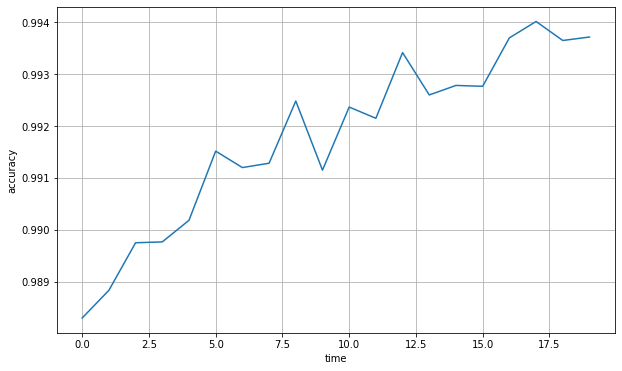

In [16]:
plt.figure(figsize=(10, 6))
plot_graphs(history, 'accuracy')
plt.show()

# test model

In [17]:
# evaluate model with data its never seen
test_loss = model.evaluate(x_test, y_test)


313/313 [==============================] - 1s 4ms/step - loss: 0.7917 - accuracy: 0.9073


# clean up

terminate memory kernel to free up resources

In [0]:
import os, signal

os.kill(os.getpid(), signal.SIGKILL)